# MAT281 - Laboratorio N°04

<a id='p1'></a>

## Problema 01

En la carpeta data se encuentra el archivo `nba.db`, el cual muestra informacion básica de algunos jugadores de la NBA.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHCVR_4gPOmYYGglSV0rT1WlJtgRGnIw6Z6G68PTY1r_Qunv-6C3BDIa3jnStoNvdgcEE&usqp=CAU" align="center"/>



In [36]:
from sqlalchemy import create_engine
import pandas as pd
import os  

# Crear conector
conn = create_engine(os.path.join('sqlite:///', 'nba.db'))


In [37]:
# funcion de consultas
def consulta(query,conn):
    return pd.read_sql_query(query, con=conn)

In [38]:
# ejemplo
query = """
SELECT * FROM player
"""
consulta(query,conn)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",None
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",None


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos mediante código **SQL**. Para cumplir con este objetivo debe resolver las siguientes problemáticas:

### 1. Mostrar las primeras 5 filas

In [45]:
# ejemplo
query = """
SELECT
name, year_start,year_end,position,height,weight,birth_date,college
FROM player
LIMIT 5;
"""
consulta(query,conn)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


### 2. Seleccionar los valores únicos de la columna `position`.

In [89]:
query = """
SELECT DISTINCT(position) FROM player 
"""
consulta(query,conn)

,position
0,F-C
1,C-F
2,C
3,G
4,F
5,G-F
6,F-G
7,None


### 3. Seleccionar y cambiar el nombre de la columna `name` por `nombre` 

In [48]:
query = """
SELECT
name as nombre
FROM player
"""
consulta(query,conn)

,nombre
0,Alaa Abdelnaby
1,Zaid Abdul-Aziz
2,Kareem Abdul-Jabbar
3,Mahmoud Abdul-Rauf
4,Tariq Abdul-Wahad
...,...
4545,Ante Zizic
4546,Jim Zoet
4547,Bill Zopf
4548,Ivica Zubac


### 4. Determinar el tiempo (en años) de cada jugador en su posición

In [101]:
query = """
SELECT
name, year_start,year_end, (year_end-year_start) AS tiempo_en_juego 
FROM player
"""

consulta(query,conn)

,name,year_start,year_end,tiempo_en_juego
0,Alaa Abdelnaby,1991,1995,4
1,Zaid Abdul-Aziz,1969,1978,9
2,Kareem Abdul-Jabbar,1970,1989,19
3,Mahmoud Abdul-Rauf,1991,2001,10
4,Tariq Abdul-Wahad,1998,2003,5
...,...,...,...,...
4545,Ante Zizic,2018,2018,0
4546,Jim Zoet,1983,1983,0
4547,Bill Zopf,1971,1971,0
4548,Ivica Zubac,2017,2018,1


de aquí que podríamos ver la distribución del tiempo en actividad de los jugadores

In [128]:
query = """
SELECT
(year_end-year_start) AS Tiempo_en_Juego ,COUNT(name) as Total_Jugadores
FROM player
GROUP BY tiempo_en_juego 
"""

df=consulta(query,conn)


In [133]:
df.set_index("Tiempo_en_Juego", inplace=True)

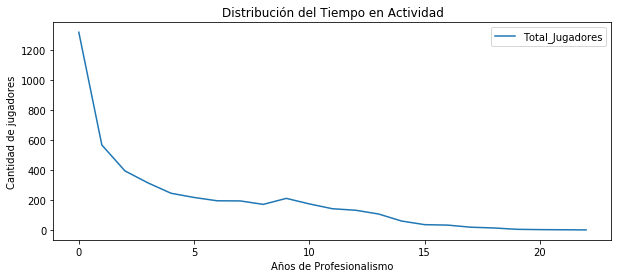

In [136]:
from matplotlib import pyplot as plt

df.plot(figsize=(10,4))
plt.title('Distribución del Tiempo en Actividad')
plt.xlabel('Años de Profesionalismo')
plt.ylabel('Cantidad de jugadores')
plt.show()

### 5. Encontrar el valor máximo de la columna `weight` por cada  valor de la columna `position`

In [57]:
query = """
SELECT
position, weight MAX
FROM player GROUP BY position
"""

consulta(query,conn)

,position,MAX
0,None,NaN
1,C,225.0
2,C-F,235.0
3,F,223.0
4,F-C,240.0
5,F-G,210.0
6,G,162.0
7,G-F,190.0


### 6. Encontrar el total de jugadores por cada valor de la columna `year_start`

In [137]:
query = """
SELECT year_start, COUNT(name) as Cantidad_de_Jugadores FROM player GROUP BY year_start
"""

consulta(query,conn)

,year_start,Cantidad_de_Jugadores
0,1947,161
1,1948,40
2,1949,94
3,1950,120
4,1951,30
...,...,...
67,2014,78
68,2015,82
69,2016,73
70,2017,88


### 7. Encontrar el valor mínimo, máximo y promedio de la columna `weight` por cada valor de la columnas `college`

In [68]:
query = """
SELECT
college,  MAX(weight) as máximo,  MIN(weight) as mínimo,  AVG(weight) as promedio
FROM player GROUP BY college
"""

consulta(query,conn)

,college,máximo,mínimo,promedio
0,None,310.0,114.0,226.513245
1,Acadia University,180.0,180.0,180.000000
2,Alabama - Huntsville,160.0,160.0,160.000000
3,Alabama A&M University,220.0,220.0,220.000000
4,Alabama State University,210.0,205.0,207.500000
...,...,...,...,...
469,Xavier University,255.0,153.0,216.388889
470,Xavier University of Louisiana,220.0,175.0,201.666667
471,Yale University,235.0,185.0,206.666667
472,Yankton College,220.0,220.0,220.000000


Veamos un ejemplo de lo anterior

Seleccionamos el colegio con más alumnos

In [153]:
query = """
SELECT
college,COUNT(name) 
FROM player 
"""
consulta(query,conn)

,college,COUNT(name)
0,Duke University,4550


In [163]:
query = """
SELECT
college,name,  weight 
FROM player 
WHERE college='Duke University'
"""

df=consulta(query,conn)
df

,college,name,weight
0,Duke University,Alaa Abdelnaby,240.0
1,Duke University,Mark Alarie,217.0
2,Duke University,Tate Armstrong,175.0
3,Duke University,William Avery,197.0
4,Duke University,Gene Banks,215.0
...,...,...,...
66,Duke University,Stephen Vacendak,185.0
67,Duke University,Bob Verga,190.0
68,Duke University,Jay Williams,195.0
69,Duke University,Shelden Williams,250.0


graficamos las alturas

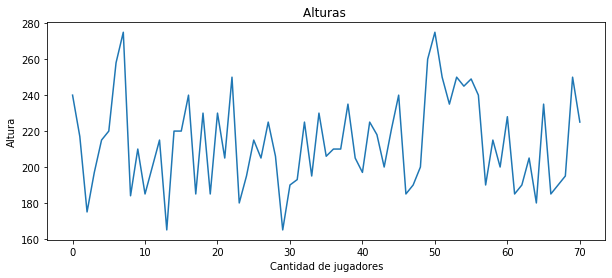

In [166]:
df['weight'].plot(figsize=(10,4))
plt.title('Alturas ')
plt.ylabel('Altura')
plt.xlabel('Cantidad de jugadores')
plt.show()

Veamos si se ajusta con lo encontrado en una busqueda en SQL

In [165]:
query = """
SELECT
college,name,  weight ,MAX(weight), MIN(weight)
FROM player 
WHERE college='Duke University'
"""
consulta(query,conn)


,college,name,weight,MAX(weight),MIN(weight)
0,Duke University,Johnny Dawkins,165.0,275.0,165.0


Es coincidente

### 8. Filtrar por aquellos jugadores que cumplan con :
* Para la columna `year_start` tienen un valor mayor 1990 y menor a 2000
* Para la columna `position` tienen un valor de `C`,`C-F` o `F-C`
* Para la columna `college` tienen un valor distinto de `Duke University`


In [88]:
query="""
SELECT
name, year_start, position, college
FROM player
WHERE (year_start BETWEEN 1991 AND 1999) AND (position ='C' or position ='C-F' or position ='F-C') AND (college != 'Duke University')

"""

consulta(query,conn)

,name,year_start,position,college
0,Victor Alexander,1992,C-F,Iowa State University
1,Peter Aluma,1999,C,Liberty University
2,John Amaechi,1996,C-F,Pennsylvania State University
3,Isaac Austin,1992,C,Arizona State University
4,Milos Babic,1991,C-F,Tennessee Technological University
...,...,...,...,...
131,Trevor Winter,1999,C,University of Minnesota
132,Lorenzen Wright,1997,F-C,University of Memphis
133,Luther Wright,1994,C,Seton Hall University
134,Sharone Wright,1995,F-C,Clemson University


### 9. Crear dos conjuntos de datos y juntarlos en una misma *query*. Las condiciones de cada uno de los cojunto de datos son:

* **df1**:
    * Para la columna `year_start` tienen un valor mayor 1990 y menor a 2000
    * Para la columna `position` tienen un valor de `C`,`C-F` o `F-C`
   
* **df2**:
    * Para la columna `year_end` tienen un valor menor a 2000
    * Para la columna `position` tienen un valor de `G`o `F` 

In [98]:
df1="""
SELECT 
name, year_start, position
FROM player
WHERE (year_start BETWEEN 1991 AND 1999) AND (position ='C' or position ='C-F' or position ='F-C') 

"""

consulta(df1,conn)

,name,year_start,position
0,Alaa Abdelnaby,1991,F-C
1,Victor Alexander,1992,C-F
2,Peter Aluma,1999,C
3,John Amaechi,1996,C-F
4,Chris Anstey,1998,C
...,...,...,...
151,Trevor Winter,1999,C
152,Lorenzen Wright,1997,F-C
153,Luther Wright,1994,C
154,Sharone Wright,1995,F-C


In [99]:
df2="""
SELECT 
name, year_start, position
FROM player
WHERE (year_start <2000) AND (position ='G' or position ='F') 

"""

consulta(df2,conn)

,name,year_start,position
0,Mahmoud Abdul-Rauf,1991,G
1,Tariq Abdul-Wahad,1998,F
2,Shareef Abdur-Rahim,1997,F
3,Tom Abernethy,1977,F
4,Forest Able,1957,G
...,...,...,...
1906,Perry Young,1987,G
1907,Dave Zeller,1962,G
1908,Gary Zeller,1971,G
1909,Tony Zeno,1980,F


In [97]:
query_union="""

SELECT 
name, year_start, position

FROM (
    
SELECT 
name, year_start, position
FROM player
WHERE (year_start BETWEEN 1991 AND 1999) AND (position ='C' or position ='C-F' or position ='F-C') 

UNION
    
SELECT 
name, year_start, position
FROM player
WHERE (year_start <2000) AND (position ='G' or position ='F') 

)
"""

consulta(query_union,conn)

,name,year_start,position
0,A.J. English,1991,G
1,A.J. Wynder,1991,G
2,A.W. Holt,1971,F
3,Aaron James,1975,F
4,Aaron McKie,1995,G
...,...,...,...
2062,York Larese,1962,G
2063,Zan Tabak,1995,C
2064,Zarko Paspalj,1990,F
2065,Zeke Sinicola,1952,G
